In [6]:
import tensorflow as tf

from smot.training import build_management
from smot.jupyter import model_reports
from smot.problems.mnist import mnist_lib

model_build_target = build_management.build_cache().target(
    name="mnist/simple",
)

In [7]:
# Load (and cache) standard MNIST dataset.
(x_train, y_train), (x_test, y_test) = mnist_lib.load_mnist_data_28x28x1()

In [8]:
# Build a single softmax categorical layer.
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(
            input_shape=mnist_lib.INPUT_SHAPE,
        ),
        tf.keras.layers.Dense(
            units=128,
            activation="relu",
        ),
        tf.keras.layers.Dense(
            units=mnist_lib.N_CLASSES,
            activation="softmax",
        ),
    ]
)

# Compile using 'Adam'
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    # Needed for the categorical softmax layer.
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"],
)

# Print the model summary.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
375/375 [==============================] - 1s 2ms/step - loss: 1.1648 - accuracy: 0.6886 - val_loss: 0.4103 - val_accuracy: 0.8964
Epoch 2/50
375/375 [==============================] - 1s 1ms/step - loss: 0.4109 - accuracy: 0.8923 - val_loss: 0.3352 - val_accuracy: 0.9119

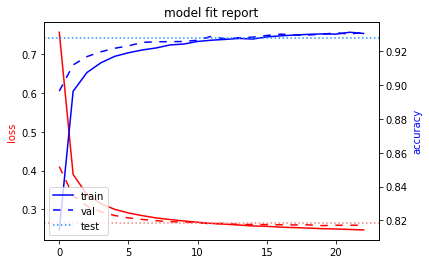

In [9]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=50,
    verbose=1,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3),
    ],
)

# Evaluate the model with the test data.
test_loss, test_accuracy = model_reports.model_fit_report(
    model=model,
    history=history,
    test_data=(x_test, y_test),
)

In [10]:
# Optional:
# model_build_target.save_model(model)

# model = model_build_target.load_model()
# model.summary()